In [1]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
#import mplfinance as mplf

In [2]:

# Dataset Generating


df=pd.read_csv('train.csv')
print(df)



            Date        Open        High         Low     Volume       Close
0     14-08-2015   57.484790   58.398406   57.342469  171718000   58.237720
1     17-08-2015   58.274453   59.013611   58.026536  163538800   58.788651
2     18-08-2015   58.453501   58.917197   58.260678  138242800   58.485638
3     19-08-2015   58.301997   58.494820   57.650069  193146000   57.801575
4     20-08-2015   57.374601   57.498558   56.249794  274006400   56.718082
...          ...         ...         ...         ...        ...         ...
1495  23-07-2021  299.658540  301.995035  298.400415   71447400  301.675507
1496  26-07-2021  301.096392  304.211720  299.958083   72434100  302.534241
1497  27-07-2021  302.793811  302.973565  295.664509  104818600  298.100861
1498  28-07-2021  294.186727  298.500271  289.653510  118931200  294.526215
1499  29-07-2021  293.947087  297.661523  293.727415   56699500  295.844238

[1500 rows x 6 columns]


In [3]:

df.shape

(1500, 6)

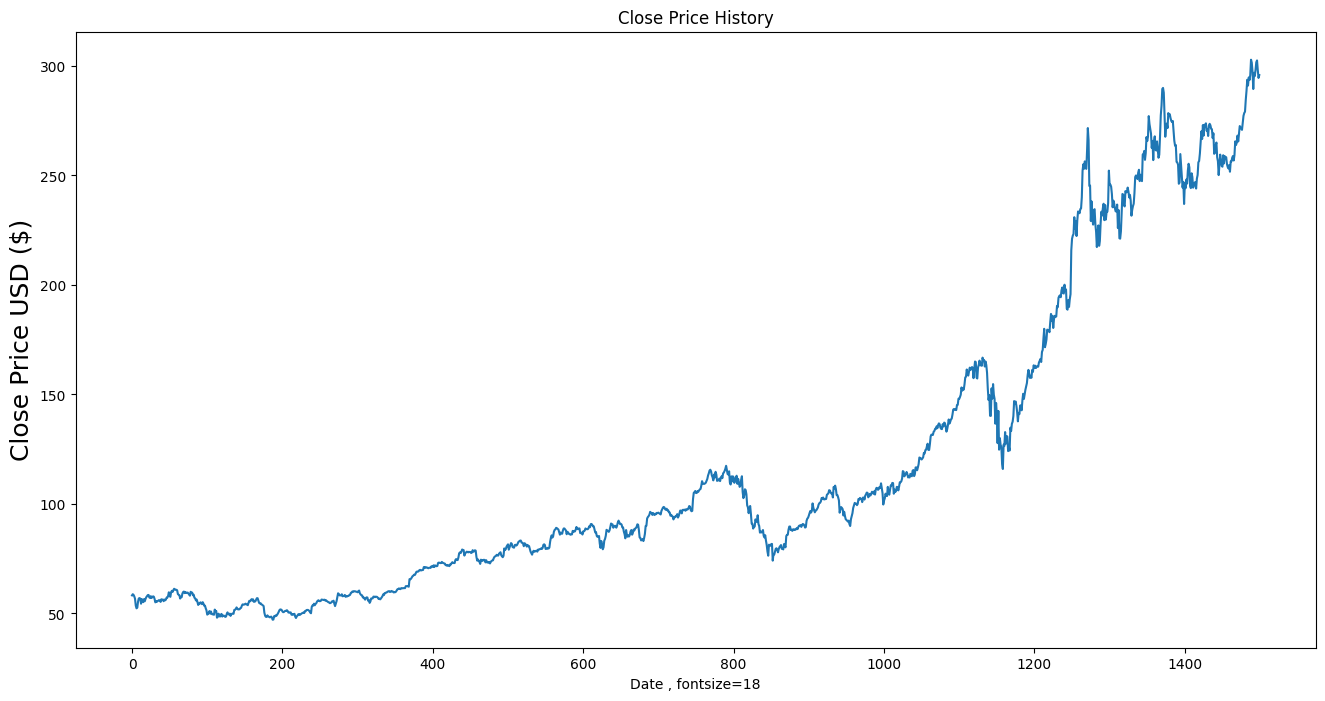

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date , fontsize=18')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# creat the 'Close Cloumn'
data=df.filter(['Close'])
print(data)
# convert to numpy
dataset=data.values
print(dataset.shape)
# the number of rows to be trained
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

           Close
0      58.237720
1      58.788651
2      58.485638
3      57.801575
4      56.718082
...          ...
1495  301.675507
1496  302.534241
1497  298.100861
1498  294.526215
1499  295.844238

[1500 rows x 1 columns]
(1500, 1)


1200

In [6]:
# scale the data
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)

print(scaled_data.shape)

(1500, 1)


In [7]:
# creat scaled data for training

train_data=scaled_data[0:training_data_len,:]

# split data to x_train , x_test
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])



In [8]:
#convert  the x_train , y_train to numpy arrays

x_train,y_train=np.array(x_train),np.array(y_train)

In [9]:
#Reshape the data

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape



(1140, 60, 1)

In [10]:
#Build the LSTM model

model=Sequential()
model.add(LSTM(50, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error')


In [12]:
# Train the Model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1140/1140 [==============================] - 33s 25ms/step - loss: 6.9019e-04


In [13]:
# Creating the testing dataset

test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
print(len(test_data))
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



360


In [14]:
#convert x_test to numpy arrays
x_test=np.array(x_test)

In [15]:
# Reshape x_test

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [16]:
# Prediction
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)

10/10 [==============================] - 1s 18ms/step


In [17]:
# The root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

8.162122749745441

<ipython-input-18-c2c54d2b4ffa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


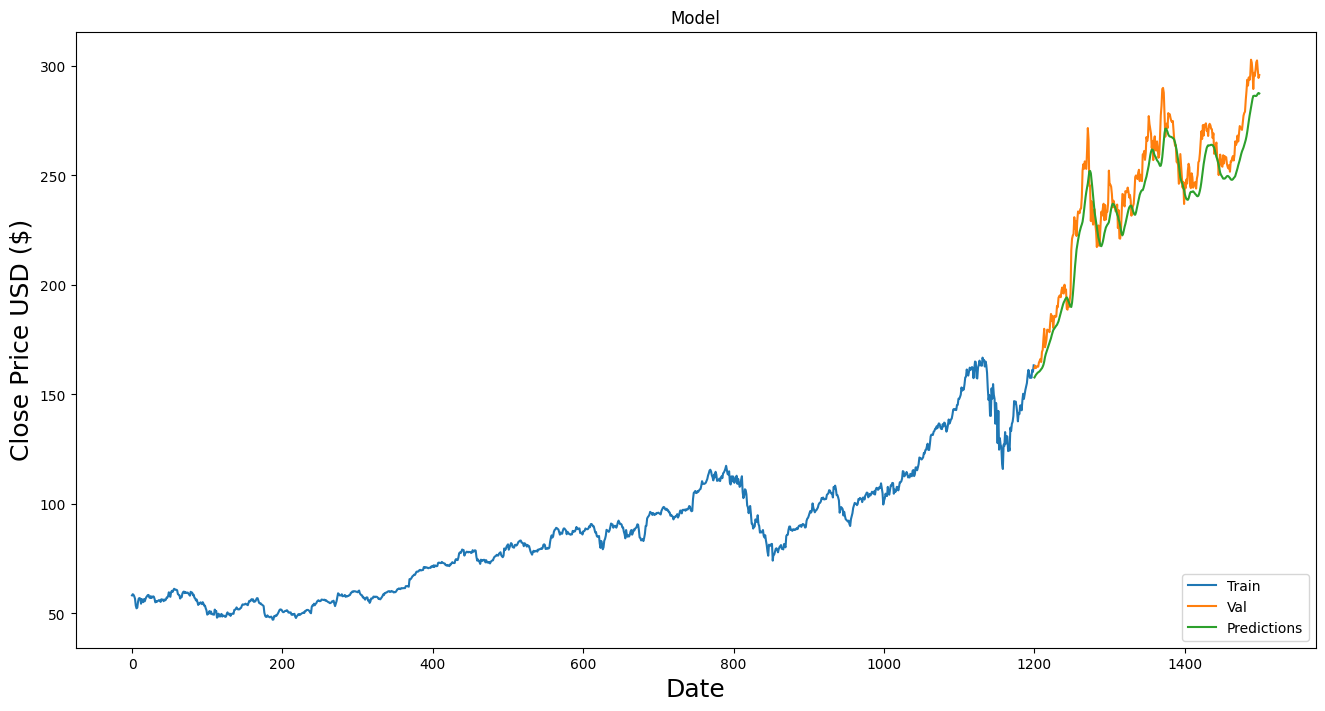

In [18]:
#Plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()




In [19]:
# Show the valid and predicted prices
valid

,Close,Predictions
1200,162.129242,157.752213
1201,163.140915,158.369400
1202,162.069748,158.977112
1203,162.754074,159.427780
1204,162.823502,159.806473
...,...,...
1495,301.675507,286.291809
1496,302.534241,286.698792
1497,298.100861,287.350067
1498,294.526215,287.660980


In [20]:


df=pd.read_csv('train.csv')

# Create a new data frame
new_df=df.filter(['Close'])


# Get the last 60 day Closing price values and convert the dataframe to an array

last_60_days=new_df[-60:].values


# Scale the data to be values between 0 and 1

last_60_days_scaled=scalar.transform(last_60_days)

# Create an empty list

X_test=[]

X_test.append(last_60_days_scaled)

# Convert the numpy array

X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)



1/1 [==============================] - 0s 48ms/step
[[287.097]]


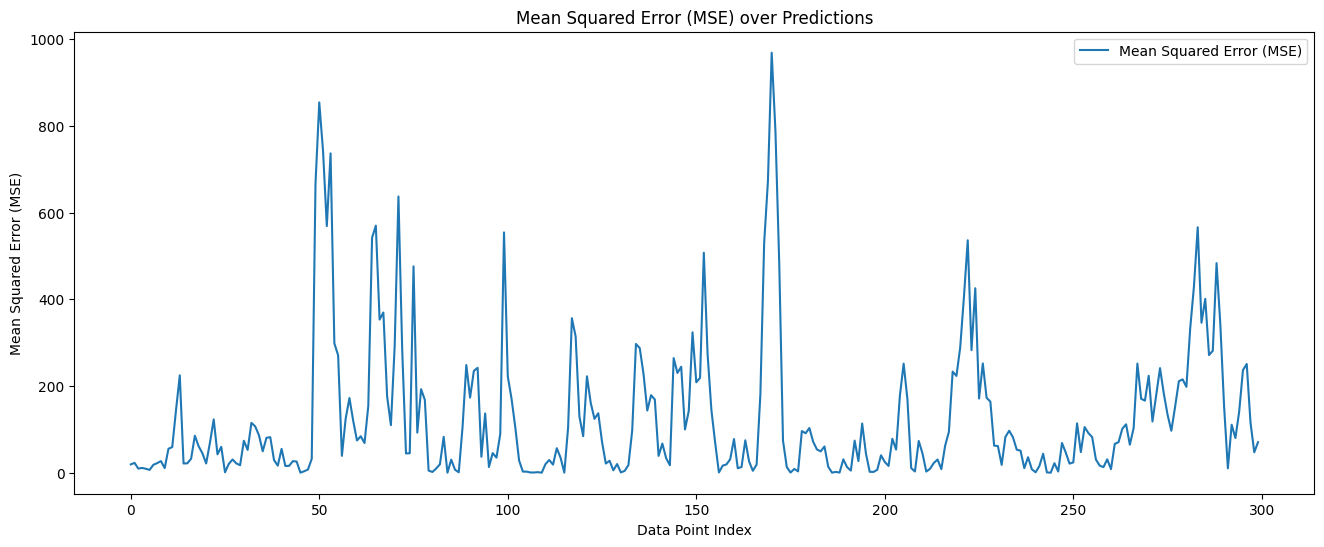

In [22]:
mse_values = (predictions - y_test)**2
plt.figure(figsize=(16, 6))
plt.plot(mse_values, label='Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) over Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import r2_score

r2_accuracy = r2_score(y_test, predictions)
print('R2 Score (Accuracy):', r2_accuracy)

R2 Score (Accuracy): 0.8808458452978928
